In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

train_image = train_image/255.0

test_image = test_image/255.0 # 归一化

input = keras.Input(shape=(28 , 28))

x = keras.layers.Flatten()(input)

x = keras.layers.Dense(32 , activation='relu')(x)

x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(64 , activation='relu')(x)

output = keras.layers.Dense(10 , activation='softmax')(x)

model = keras.Model(inputs=input,outputs=output)

In [2]:
train_image.shape

(60000, 28, 28)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________

In [4]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'],
             )

In [5]:
history = model.fit(train_image,train_label,epochs=5,validation_data=(test_image,test_label))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8162 - acc: 0.6973 - val_loss: 0.5492 - val_acc: 0.8008
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6222 - acc: 0.7702 - val_loss: 0.5452 - val_acc: 0.7960
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5820 - acc: 0.7875 - val_loss: 0.5602 - val_acc: 0.7941
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5580 - acc: 0.7965 - val_loss: 0.5033 - val_acc: 0.8158
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5399 - acc: 0.8030 - val_loss: 0.5401 - val_acc: 0.7911


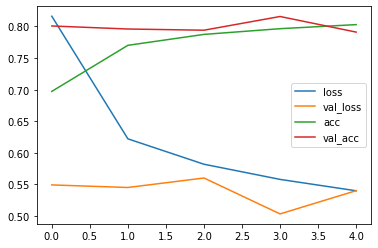

In [6]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.legend()

In [7]:
input1 = keras.Input(shape=(28 , 28))
input2 = keras.Input(shape=(28 , 28))
x1 = keras.layers.Flatten()(input1)
x2 = keras.layers.Flatten()(input2)

x = keras.layers.concatenate([x1 , x2])
x = keras.layers.Dense(32 , activation='relu')(x)
output = keras.layers.Dense(1 , activation='sigmoid')(x)

In [8]:
model = keras.Model(inputs=[input1,input2],outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           input_2[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           input_3[0][0]                    
____________________________________________________________________________________________

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'],
             )

In [10]:
# history = model.fit([train_image,test_image],train_label,epochs=5)

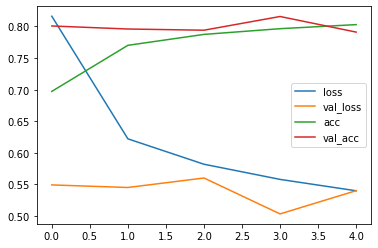

In [11]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.legend()